## Overplotting, Transparency, and Jitter

If we have a very large number of points to plot or our numeric variables are discrete-valued, then it is possible that using a scatterplot straightforwardly will not be informative. The visualization will suffer from __overplotting__, where the high amount of overlap in points makes it difficult to see the actual relationship between the plotted variables.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

df = pd.read_csv('data/fuel_econ.csv')
df.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


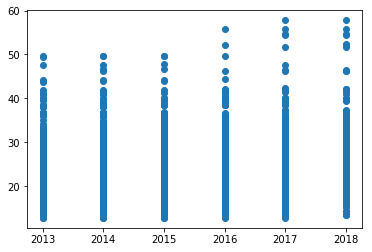

In [2]:
plt.scatter(data = df, x = 'year', y = 'comb')

In the above plot, we can infer some kind of negative relationship between the two variables, but the degree of variability in the data and strength of relationship are fairly unclear. In cases like this, we may want to employ transparency and jitter to make the scatterplot more informative.

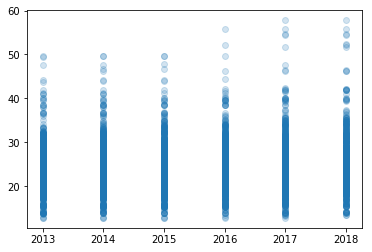

In [4]:
plt.scatter(data = df, x = 'year', y = 'comb', alpha = 1/5)

Where more points overlap, the darker the image will be. Here, we can now see that there is a moderate negative relationship between the two numeric variables. Values of 0 and 10 on the x-axis are much rarer than the central values.

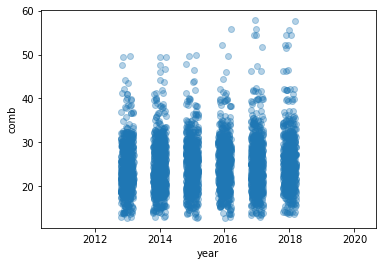

In [6]:
sb.regplot(data = df, x = 'year', y = 'comb', 
           fit_reg = False, x_jitter = 0.2, 
           y_jitter = 0.2, scatter_kws = {'alpha' : 1/3})

The jitter settings will cause each point to be plotted in a uniform ±0.2 range of their true values. Note that transparency has been changed to be a dictionary assigned to the "scatter_kws" parameter. This is necessary so that transparency is specifically associated with the scatter component of the regplot function.

## Heat Map

For __quantitative variable__ vs __quantitative variable__

* Good for __discrete variable__ vs __discrete variable__
* Good alternative to transparency for a lot of data
* Bin sizes are important (Too big you may loose data and to small you may be distracted by noise)

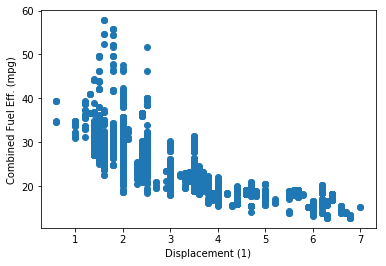

In [7]:
plt.scatter(data = df, x='displ', y='comb')
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

In [8]:
df[['displ', 'comb']].describe()

,displ,comb
count,3929.000000,3929.000000
mean,2.950573,24.791339
std,1.305901,6.003246
min,0.600000,12.821700
25%,2.000000,20.658100
50%,2.500000,24.000000
75%,3.600000,28.227100
max,7.000000,57.782400


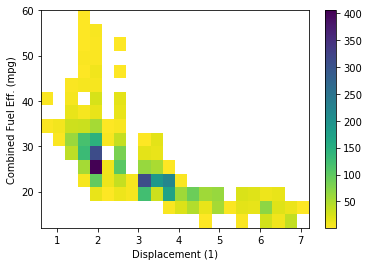

In [9]:
bins_x = np.arange(0.6, 7+0.3, 0.3)
bins_y = np.arange(12, 58+3, 3)
plt.hist2d(data = df, x = 'displ', y = 'comb', cmin = 0.5, 
           cmap = 'viridis_r', bins = [bins_x, bins_y])
plt.colorbar()
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

A heat map is a 2-d version of the histogram that can be used as an alternative to a scatterplot. Like a scatterplot, the values of the two numeric variables to be plotted are placed on the plot axes. Similar to a histogram, the plotting area is divided into a grid and the number of points in each grid rectangle is added up. Since there won't be room for bar heights, counts are indicated instead by grid cell color

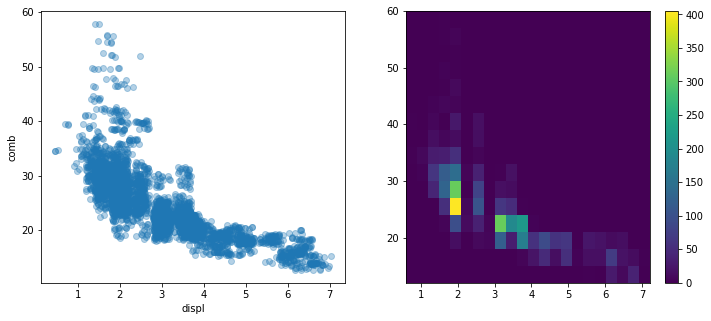

In [12]:
plt.figure(figsize = [12, 5])
# Left plot: scatterplot of discrete data with jitte and transparency
plt.subplot(1, 2, 1)
sb.regplot(data = df, x = 'displ', y = 'comb', fit_reg = False,
          x_jitter = 0.2, y_jitter = 0.2, scatter_kws = { 'alpha': 1/3})

# Right plot: heat map with bins edges between values
plt.subplot(1, 2, 2)
bins_x = np.arange(0.6, 7+0.3, 0.3)
bins_y = np.arange(12, 58+3, 3)
plt.hist2d(data = df, x = 'displ', y = 'comb', bins = [bins_x, bins_y])

plt.colorbar()

#### Alternative variations

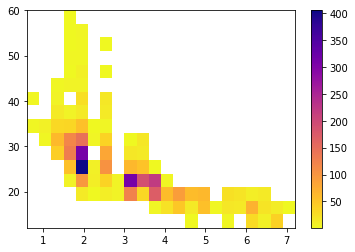

In [16]:
bins_x = np.arange(0.6, 7+0.3, 0.3)
bins_y = np.arange(12, 58+3, 3)
plt.hist2d(data = df, x = 'displ', y = 'comb', 
           bins = [bins_x, bins_y], cmap = 'plasma_r', cmin = 0.5)

plt.colorbar()

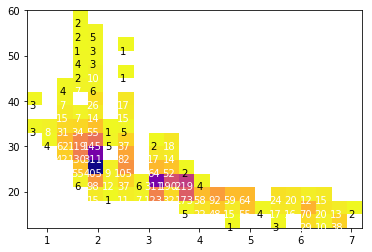

In [19]:
# hist2d returns a number of diffent variables, including an array of counts
bins_x = np.arange(0.6, 7+0.3, 0.3)
bins_y = np.arange(12, 58+3, 3)
h2d = plt.hist2d(data = df, x = 'displ', y = 'comb', 
           bins = [bins_x, bins_y], cmap = 'plasma_r', cmin = 0.5)
counts = h2d[0]

# loop through the cell counts and add text annotations for each
for i in range(counts.shape[0]):
    for j in range(counts.shape[1]):
        c = counts[i,j]
        if c>=7: #incresate visibility on darkest cell
            plt.text(bins_x[i]+0.1, bins_y[j]+0.1, int(c), 
                    ha = 'center', va = 'center', color = 'white')
        elif c > 0:
            plt.text(bins_x[i]+0.1, bins_y[j]+0.1, int(c),
                    ha = 'center', va = 'center', color = 'black')

If you have too many cells in your heat map, then the annotations will end up being too overwhelming, too much to attend to. In cases like that, it's best to leave off the annotations and let the data and colorbar speak for themselves. You're more likely to see annotations in a categorical heat map, where there are going to be fewer cells plotted. Indeed, there is a parameter built into seaborn's heatmap function for just that, as will be seen later.